# Module 11 Challenge
## Deliverable 2: Scrape and Analyze Mars Weather Data

In [89]:
# Import relevant libraries
from splinter import Browser
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
import pandas as pd
from pathlib import Path

In [90]:
browser = Browser('chrome')

### Step 1: Visit the Website

Use automated browsing to visit the [Mars Temperature Data Site](https://static.bc-edx.com/data/web/mars_facts/temperature.html). Inspect the page to identify which elements to scrape.

   > **Hint** To identify which elements to scrape, you might want to inspect the page by using Chrome DevTools to discover whether the table contains usable classes.


In [91]:
# Visit the website
# https://static.bc-edx.com/data/web/mars_facts/temperature.html
url = "https://static.bc-edx.com/data/web/mars_facts/temperature.html"
browser.visit(url)

### Step 2: Scrape the Table

Create a Beautiful Soup object and use it to scrape the data in the HTML table.

Note that this can also be achieved by using the Pandas `read_html` function. However, use Beautiful Soup here to continue sharpening your web scraping skills.

In [92]:
# Create a Beautiful Soup Object
html = browser.html
soup = BeautifulSoup(html, 'html.parser')

In [93]:
# Extract all rows of data
table = soup.find('table', class_= "table")


### Step 3: Store the Data

Assemble the scraped data into a Pandas DataFrame. The columns should have the same headings as the table on the website. Here’s an explanation of the column headings:

* `id`: the identification number of a single transmission from the Curiosity rover
* `terrestrial_date`: the date on Earth
* `sol`: the number of elapsed sols (Martian days) since Curiosity landed on Mars
* `ls`: the solar longitude
* `month`: the Martian month
* `min_temp`: the minimum temperature, in Celsius, of a single Martian day (sol)
* `pressure`: The atmospheric pressure at Curiosity's location

In [94]:
# Create an empty list
mars_data = []
rows = table.find_all('tr')

# Loop through the scraped data to find and create a list of rows
for row in rows:
    data = row.find_all("td")

    # List comprehension to loop through rows
    values = [row.text for row in data]
    
    # Append to dictionary
    mars_data.append(values)
   

In [95]:
mars_data

[[],
 ['2', '2012-08-16', '10', '155', '6', '-75.0', '739.0'],
 ['13', '2012-08-17', '11', '156', '6', '-76.0', '740.0'],
 ['24', '2012-08-18', '12', '156', '6', '-76.0', '741.0'],
 ['35', '2012-08-19', '13', '157', '6', '-74.0', '732.0'],
 ['46', '2012-08-20', '14', '157', '6', '-74.0', '740.0'],
 ['57', '2012-08-21', '15', '158', '6', '-78.0', '740.0'],
 ['68', '2012-08-22', '16', '158', '6', '-77.0', '740.0'],
 ['79', '2012-08-23', '17', '159', '6', '-76.0', '742.0'],
 ['112', '2012-08-27', '21', '161', '6', '-74.0', '741.0'],
 ['114', '2012-08-28', '22', '162', '6', '-74.0', '742.0'],
 ['123', '2012-08-29', '23', '162', '6', '-75.0', '741.0'],
 ['134', '2012-08-30', '24', '163', '6', '-75.0', '742.0'],
 ['145', '2012-08-31', '25', '163', '6', '-75.0', '743.0'],
 ['156', '2012-09-01', '26', '164', '6', '-76.0', '745.0'],
 ['163', '2012-09-02', '27', '164', '6', '-75.0', '743.0'],
 ['170', '2012-09-03', '28', '165', '6', '-75.0', '745.0'],
 ['171', '2012-09-04', '29', '166', '6', '-7

In [96]:
# Create a Pandas DataFrame by using the list of rows and a list of the column names
df = pd.DataFrame(mars_data, columns = {'id': mars_data, 'terrestrial_date': mars_data,
                                             'sol': mars_data, 'ls': mars_data, 'month': mars_data, 
                                             'min_temp': mars_data, 'pressure': mars_data})
mars_df = df.dropna()

In [97]:
# Confirm DataFrame was created successfully
mars_df.head()

,id,terrestrial_date,sol,ls,month,min_temp,pressure
1,2,2012-08-16,10,155,6,-75.0,739.0
2,13,2012-08-17,11,156,6,-76.0,740.0
3,24,2012-08-18,12,156,6,-76.0,741.0
4,35,2012-08-19,13,157,6,-74.0,732.0
5,46,2012-08-20,14,157,6,-74.0,740.0


### Step 4: Prepare Data for Analysis

Examine the data types that are currently associated with each column. If necessary, cast (or convert) the data to the appropriate `datetime`, `int`, or `float` data types.

  > **Hint** You can use the Pandas `astype` and `to_datetime` methods to accomplish this task.


In [98]:
# Examine data type of each column
mars_df.dtypes

id                  object
terrestrial_date    object
sol                 object
ls                  object
month               object
min_temp            object
pressure            object
dtype: object

In [99]:
# Change data types for data analysis
mars_df['terrestrial_date'] = mars_df['terrestrial_date'].astype('datetime64[ns]')
mars_df['sol'] = mars_df['sol'].astype('int64')
mars_df['ls'] = mars_df['ls'].astype('int64')
mars_df['month'] = mars_df['month'].astype('int64')
mars_df['min_temp'] = mars_df['min_temp'].astype('float64')
mars_df['pressure'] = mars_df['pressure'].astype('float64')

/var/folders/tx/sr99h3gn7plb88mpxvnnnj3m0000gn/T/ipykernel_49544/4271116757.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mars_df['terrestrial_date'] = mars_df['terrestrial_date'].astype('datetime64[ns]')
/var/folders/tx/sr99h3gn7plb88mpxvnnnj3m0000gn/T/ipykernel_49544/4271116757.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mars_df['sol'] = mars_df['sol'].astype('int64')
/var/folders/tx/sr99h3gn7plb88mpxvnnnj3m0000gn/T/ipykernel_49544/4271116757.py:4: SettingWithCopyWarning: 
A value is trying 

In [100]:
# Confirm type changes were successful by examining data types again
mars_df.dtypes

id                          object
terrestrial_date    datetime64[ns]
sol                          int64
ls                           int64
month                        int64
min_temp                   float64
pressure                   float64
dtype: object

### Step 5: Analyze the Data
 
#### Questions and answers are located in markdowns before each graph. 

### 1. How many months exist on Mars?
In total, there are 12 months on mars.

In [101]:
# 1. How many months are there on Mars?
month_count = mars_df['month'].value_counts()
month_count.sort_index()


1     174
2     178
3     192
4     194
5     149
6     147
7     142
8     141
9     134
10    112
11    138
12    166
Name: month, dtype: int64

### 2. How many Martian (and not Earth) days worth of data exist in the scraped dataset?
There is 1867 Martian days worth of data

In [102]:
# 2. How many Martian days' worth of data are there?
martian_days = mars_df['terrestrial_date'].nunique()
martian_days

1867

### 3. What is the average low temperature by month?
The average low temperature varies by month, but is in a range of -69 to - 83 degrees celsius. 

In [103]:
# 3. What is the average low temperature by month?
avg_temp = mars_df.groupby('month')['min_temp'].mean()
avg_temp

month
1    -77.160920
2    -79.932584
3    -83.307292
4    -82.747423
5    -79.308725
6    -75.299320
7    -72.281690
8    -68.382979
9    -69.171642
10   -71.982143
11   -71.985507
12   -74.451807
Name: min_temp, dtype: float64

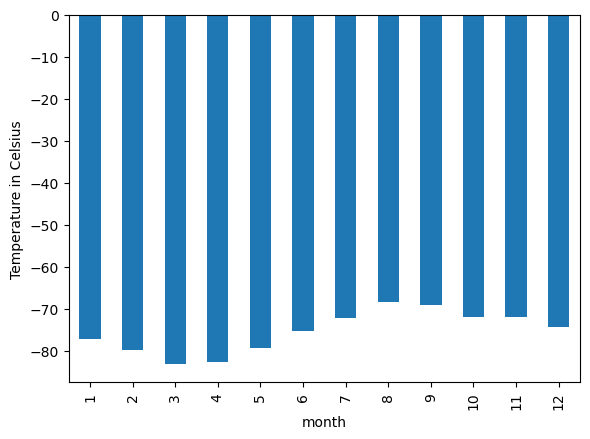

In [104]:
# Plot the average temperature by month
avg_temp.plot(kind="bar", figsize=(6,4.5), rot=90)

# Set axis names
plt.xlabel('month')
plt.ylabel('Temperature in Celsius')
plt.tight_layout()
plt.show()


### Identify the coldest and hottest months in Curiosity's location
For this dataset, the coldest month is March (month 3), and the hottest month is August (month 8)

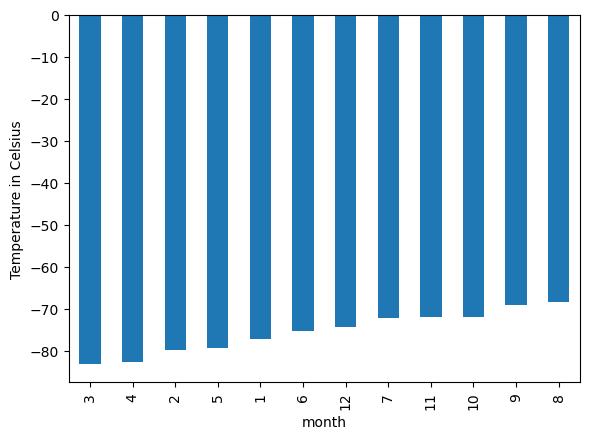

In [105]:
# Identify the coldest and hottest months in Curiosity's location
avg_temp.sort_values().plot(kind="bar", figsize=(6,4.5), rot=90)
# Set axis names
plt.xlabel('month')
plt.ylabel('Temperature in Celsius')
plt.tight_layout()
plt.show()

### 4. Which months have the lowest and the highest atmospheric pressure on Mars?
The month with the lowest atmospheric pressure on Mars is June (month 6).
The month with the highest atmospheric pressure on Mars is September (month 9)

In [106]:
# 4. Average pressure by Martian month
avg_pressure = mars_df.groupby('month')['pressure'].mean()
avg_pressure

month
1     862.488506
2     889.455056
3     877.322917
4     806.329897
5     748.557047
6     745.054422
7     795.105634
8     873.829787
9     913.305970
10    887.312500
11    857.014493
12    842.156627
Name: pressure, dtype: float64

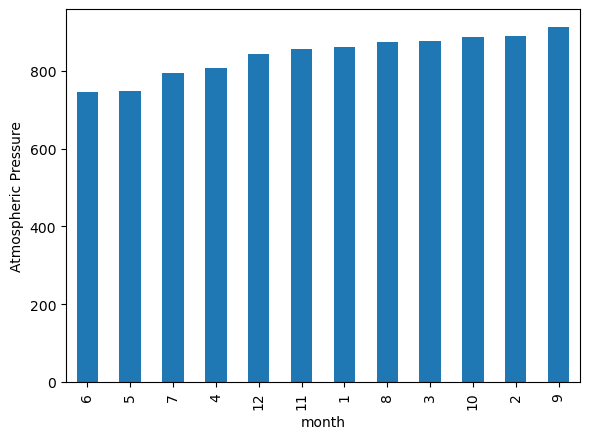

In [107]:
# Plot the average temperature by month
avg_pressure.sort_values().plot(kind="bar", figsize=(6,4.5))

# Set axis names
plt.xlabel('month')
plt.ylabel('Atmospheric Pressure')
plt.tight_layout()
plt.show()

### 5. How many terrestrial (earth) days are there in a Martian year?
There are close to 2000 earth days in a Martian year. 

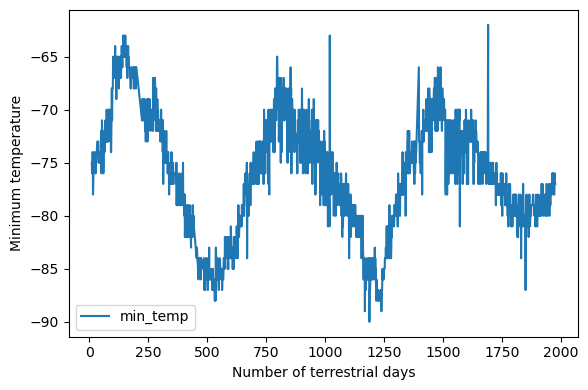

In [108]:

# 5. How many terrestrial (earth) days are there in a Martian year?
mars_df.plot(kind='line', x='sol', y='min_temp', figsize=(6,4))
plt.xlabel('Number of terrestrial days')
plt.ylabel('Minimum temperature')
plt.tight_layout()
plt.show()

On average, the third month has the coldest minimum temperature on Mars, and the eighth month is the warmest. But it is always very cold there in human terms!



Atmospheric pressure is, on average, lowest in the sixth month and highest in the ninth.

The distance from peak to peak is roughly 1425-750, or 675 days. A year on Mars appears to be about 675 days from the plot. Internet search confirms that a Mars year is equivalent to 687 earth days.

### Step 6: Save the Data

Export the DataFrame to a CSV file.

In [111]:
# Write the data to a CSV
mars_df.to_csv('mars_dataframe', index=False)

In [112]:
browser.quit()